In [2]:
import pandas as pd
import numpy as np

FILE_PATH = "gis dataset.csv"

# NASA POWER tabular header usually starts around row 18
df = pd.read_csv(FILE_PATH, header=18)

# Clean column names
df.columns = [str(c).strip() for c in df.columns]

print(df.head())
print(df.columns)


   YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN    T2M  PRECTOTCORR  \
0  2016   6   1   0                0.0                0.0  23.37         0.98   
1  2016   6   1   1                0.0                0.0  23.00         1.15   
2  2016   6   1   2                0.0                0.0  22.76         1.18   
3  2016   6   1   3                0.0                0.0  22.59         0.96   
4  2016   6   1   4                0.0                0.0  22.45         0.56   

      PS   RH2M  WS10M  ALLSKY_SFC_UVA  ALLSKY_SFC_UVB  ALLSKY_SFC_UV_INDEX  
0  91.62  85.57   4.02             0.0             0.0                  0.0  
1  91.56  89.44   4.21             0.0             0.0                  0.0  
2  91.52  91.97   4.03             0.0             0.0                  0.0  
3  91.52  93.13   3.65             0.0             0.0                  0.0  
4  91.55  93.58   3.31             0.0             0.0                  0.0  
Index(['YEAR', 'MO', 'DY', 'HR', 'ALLSKY_SFC_

In [3]:
# Replace sentinel values
df.replace([-999, "-999", -999.0, "-999.0"], np.nan, inplace=True)

df.isnull().sum()


,0
YEAR,0
MO,0
DY,0
HR,0
ALLSKY_SFC_SW_DWN,0
CLRSKY_SFC_SW_DWN,0
T2M,0
PRECTOTCORR,0
PS,0
RH2M,0


In [4]:
df["datetime"] = pd.to_datetime(
    df[["YEAR","MO","DY","HR"]].rename(columns={
        "YEAR": "year",
        "MO": "month",
        "DY": "day",
        "HR": "hour"
    }),
    errors="coerce"
)

df.set_index("datetime", inplace=True)
df = df.sort_index()

print(df.index.min(), df.index.max())


2016-06-01 00:00:00 2025-06-01 23:00:00


In [5]:
for col in df.columns:
    if col not in ["YEAR","MO","DY","HR"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78912 entries, 2016-06-01 00:00:00 to 2025-06-01 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 78912 non-null  int64  
 1   MO                   78912 non-null  int64  
 2   DY                   78912 non-null  int64  
 3   HR                   78912 non-null  int64  
 4   ALLSKY_SFC_SW_DWN    78912 non-null  float64
 5   CLRSKY_SFC_SW_DWN    78912 non-null  float64
 6   T2M                  78912 non-null  float64
 7   PRECTOTCORR          78912 non-null  float64
 8   PS                   78912 non-null  float64
 9   RH2M                 78912 non-null  float64
 10  WS10M                78912 non-null  float64
 11  ALLSKY_SFC_UVA       78912 non-null  float64
 12  ALLSKY_SFC_UVB       78912 non-null  float64
 13  ALLSKY_SFC_UV_INDEX  78831 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 9.0 MB


In [6]:
print("Shape:", df.shape)

print("\nSummary stats:")
display(df.describe())

print("\nMissing %:")
display((df.isnull().mean() * 100).sort_values(ascending=False))


Shape: (78912, 14)

Summary stats:


,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,PRECTOTCORR,PS,RH2M,WS10M,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX
count,78912.000000,78912.000000,78912.000000,78912.00000,78912.000000,78912.000000,78912.000000,78912.000000,78912.000000,78912.000000,78912.00000,78912.000000,78912.000000,78831.000000
mean,2020.416058,6.523114,15.724148,11.50000,221.724464,273.567732,23.924586,2.630115,91.673188,68.657922,3.94487,13.141731,0.384297,2.002322
std,2.629326,3.448118,8.802131,6.92223,298.196456,351.908728,5.135215,10.787209,0.265129,25.178160,1.95461,17.826697,0.597034,3.154663
min,2016.000000,1.000000,1.000000,0.00000,0.000000,0.000000,9.220000,0.000000,90.810000,3.730000,0.04000,0.000000,0.000000,0.000000
25%,2018.000000,4.000000,8.000000,5.75000,0.000000,0.000000,20.310000,0.000000,91.480000,50.280000,2.55000,0.000000,0.000000,0.000000
50%,2020.000000,7.000000,16.000000,11.50000,6.070000,7.320000,23.160000,0.010000,91.660000,72.950000,3.63000,0.330000,0.000000,0.000000
75%,2023.000000,10.000000,23.000000,17.25000,445.485000,580.620000,27.320000,0.980000,91.860000,92.280000,4.94000,26.370000,0.660000,3.380000
max,2025.000000,12.000000,31.000000,23.00000,1071.280000,1071.380000,40.780000,734.660000,92.560000,100.000000,13.63000,65.690000,2.470000,13.850000



Missing %:


,0
ALLSKY_SFC_UV_INDEX,0.102646
YEAR,0.000000
DY,0.000000
HR,0.000000
ALLSKY_SFC_SW_DWN,0.000000
MO,0.000000
CLRSKY_SFC_SW_DWN,0.000000
T2M,0.000000
PS,0.000000
PRECTOTCORR,0.000000


In [7]:
irr_cols = [c for c in df.columns if "ALLSKY" in c or "SW_DWN" in c]
irr_cols


['ALLSKY_SFC_SW_DWN',
 'CLRSKY_SFC_SW_DWN',
 'ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB',
 'ALLSKY_SFC_UV_INDEX']

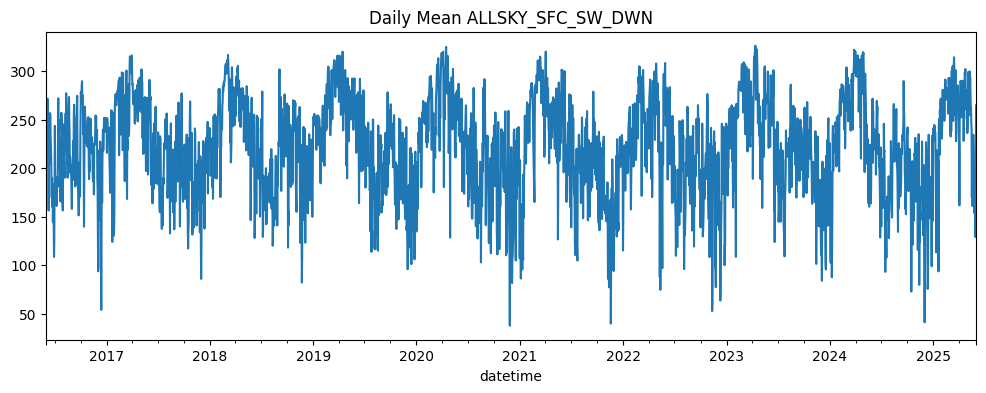

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,4)

main = irr_cols[0]

df[main].resample("D").mean().plot(title=f"Daily Mean {main}")
plt.show()


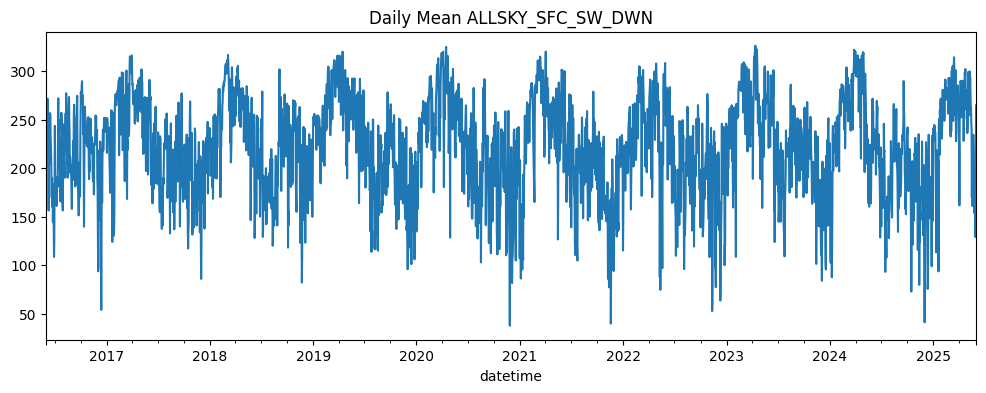

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,4)

main = irr_cols[0]

df[main].resample("D").mean().plot(title=f"Daily Mean {main}")
plt.show()


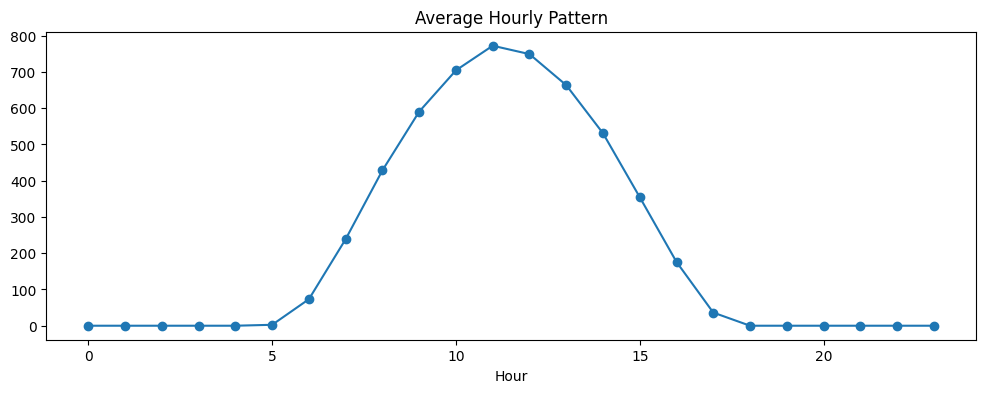

In [10]:
df.groupby(df.index.hour)[main].mean().plot(marker="o", title="Average Hourly Pattern")
plt.xlabel("Hour")
plt.show()


In [11]:
for col in df.columns:
    df[col] = df[col].interpolate(method="time").fillna(method="bfill").fillna(method="ffill")

df.isnull().sum()


/tmp/ipython-input-2568934730.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method="time").fillna(method="bfill").fillna(method="ffill")
/tmp/ipython-input-2568934730.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method="time").fillna(method="bfill").fillna(method="ffill")
/tmp/ipython-input-2568934730.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method="time").fillna(method="bfill").fillna(method="ffill")
/tmp/ipython-input-2568934730.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].interpolate(method="time"

,0
YEAR,0
MO,0
DY,0
HR,0
ALLSKY_SFC_SW_DWN,0
CLRSKY_SFC_SW_DWN,0
T2M,0
PRECTOTCORR,0
PS,0
RH2M,0


In [12]:
from scipy import stats

main = irr_cols[0]
z = np.abs(stats.zscore(df[main].fillna(df[main].median())))
outliers = df.index[z > 4]     # threshold = 4

print("Number of outliers:", len(outliers))

# Replace outliers by NaN & re-interpolate
df.loc[outliers, main] = np.nan
df[main] = df[main].interpolate(method="time")


Number of outliers: 0


In [13]:
df["daily_sum"] = df[main].resample("D").sum().reindex(df.index, method="ffill")


In [14]:
if "CLRSKY_SFC_SW_DWN" in df.columns:
    df["clear_sky_ratio"] = (df[main] / df["CLRSKY_SFC_SW_DWN"]).replace([np.inf,-np.inf], np.nan).fillna(0)


In [15]:
df["hour"] = df.index.hour
df["month"] = df.index.month

df["hour_sin"] = np.sin(2*np.pi*df["hour"]/24)
df["hour_cos"] = np.cos(2*np.pi*df["hour"]/24)

df["month_sin"] = np.sin(2*np.pi*(df["month"]-1)/12)
df["month_cos"] = np.cos(2*np.pi*(df["month"]-1)/12)


In [16]:
for lag in [1,2,3,6,12,24,48,168]:   # 1hr,2hr,...7 days
    df[f"{main}_lag{lag}"] = df[main].shift(lag)


In [17]:
for w in [3,6,12,24,72]:
    df[f"{main}_roll_mean_{w}h"] = df[main].rolling(w, min_periods=1).mean()
    df[f"{main}_roll_std_{w}h"]  = df[main].rolling(w, min_periods=1).std().fillna(0)


In [18]:
all_nan_cols = df.columns[df.isnull().all()]
df.drop(columns=all_nan_cols, inplace=True)


In [19]:
OUTPUT_PATH = "gis_preprocessed_full.csv"
df.to_csv(OUTPUT_PATH)

print("Saved to:", OUTPUT_PATH)
df.head()


Saved to: gis_preprocessed_full.csv


,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,T2M,PRECTOTCORR,PS,RH2M,...,ALLSKY_SFC_SW_DWN_roll_mean_3h,ALLSKY_SFC_SW_DWN_roll_std_3h,ALLSKY_SFC_SW_DWN_roll_mean_6h,ALLSKY_SFC_SW_DWN_roll_std_6h,ALLSKY_SFC_SW_DWN_roll_mean_12h,ALLSKY_SFC_SW_DWN_roll_std_12h,ALLSKY_SFC_SW_DWN_roll_mean_24h,ALLSKY_SFC_SW_DWN_roll_std_24h,ALLSKY_SFC_SW_DWN_roll_mean_72h,ALLSKY_SFC_SW_DWN_roll_std_72h
datetime,,,,,,,,,,,,,,,,,,,,,
2016-06-01 00:00:00,2016,6,1,0,0.0,0.0,23.37,0.98,91.62,85.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01 01:00:00,2016,6,1,1,0.0,0.0,23.00,1.15,91.56,89.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01 02:00:00,2016,6,1,2,0.0,0.0,22.76,1.18,91.52,91.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01 03:00:00,2016,6,1,3,0.0,0.0,22.59,0.96,91.52,93.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01 04:00:00,2016,6,1,4,0.0,0.0,22.45,0.56,91.55,93.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Assuming 'df' is your fully preprocessed dataframe with datetime index

train_end = "2023-06-01"
test_start = "2023-06-01"
test_end = "2025-06-01"

# -----------------------
# 1. TRAIN DATA SPLIT
# -----------------------
df_train = df.loc[:train_end]

# -----------------------
# 2. TEST DATA SPLIT
# -----------------------
df_test = df.loc[test_start:test_end]

print("Train:", df_train.shape)
print("Test:", df_test.shape)

# -----------------------
# 3. SAVE TO CSV FILES
# -----------------------
df_train.to_csv("train.csv", index=True)
df_test.to_csv("test.csv", index=True)

print("Saved:")
print(" - train.csv")
print(" - test.csv")


Train: (61368, 40)
Test: (17568, 40)
Saved:
 - train.csv
 - test.csv


xgboost version: 3.1.2
Train shape: (61368, 40) Test shape: (17568, 40)
Using 35 features. Example: ['CLRSKY_SFC_SW_DWN', 'T2M', 'PRECTOTCORR', 'PS', 'RH2M', 'WS10M', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'daily_sum']
Train rows: 55231 Val rows: 6137 Test rows: 17568
Saved scaler -> scaler.joblib
[0]	train-rmse:288.81025	val-rmse:302.68732
[50]	train-rmse:63.85561	val-rmse:68.78767
[100]	train-rmse:15.08197	val-rmse:17.65597
[150]	train-rmse:5.68260	val-rmse:7.69854
[200]	train-rmse:4.25060	val-rmse:6.05819
[250]	train-rmse:3.72860	val-rmse:5.57173
[300]	train-rmse:3.40503	val-rmse:5.30612
[350]	train-rmse:3.14207	val-rmse:5.11991
[400]	train-rmse:2.93582	val-rmse:4.97389
[450]	train-rmse:2.75221	val-rmse:4.85408
[500]	train-rmse:2.59475	val-rmse:4.74143
[550]	train-rmse:2.46213	val-rmse:4.65699
[600]	train-rmse:2.34077	val-rmse:4.57863
[650]	train-rmse:2.23626	val-rmse:4.51678
[700]	train-rmse:2.14511	val-rmse:4.46511
[750]	train-rmse:2.06003	val-rmse:4.41070
[800

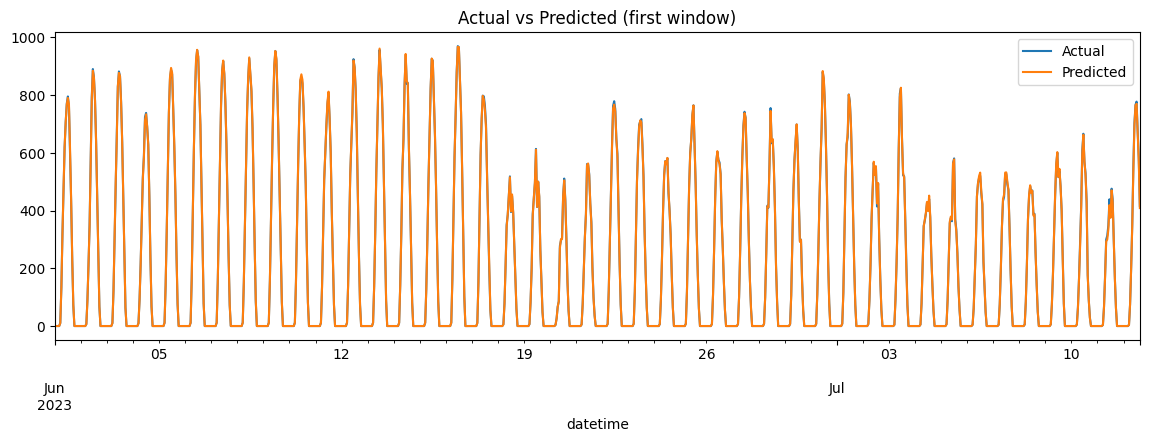

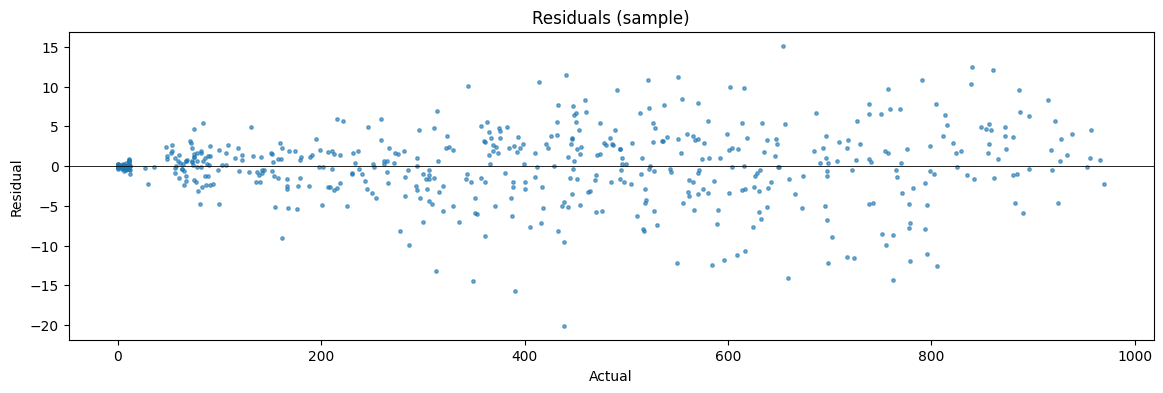

In [21]:
# Robust XGBoost training using xgb.train + DMatrix (works across XGBoost versions)
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

print("xgboost version:", xgb.__version__)

# ---------- file paths (no /mnt/data) ----------
TRAIN_PATH = "train.csv"
TEST_PATH  = "test.csv"
TARGET = "ALLSKY_SFC_SW_DWN"

SAVE_MODEL_PATH = "xgb_booster.json"      # saved by Booster.save_model()
SAVE_SCALER_PATH = "scaler.joblib"
SAVE_PRED_CSV = "test_with_preds.csv"
RANDOM_STATE = 42
# ------------------------------------------------

# helper load
def load_df(path):
    df = pd.read_csv(path)
    if "datetime" in df.columns:
        df["datetime"] = pd.to_datetime(df["datetime"])
        df.set_index("datetime", inplace=True)
    return df

# 1) load
df_train = load_df(TRAIN_PATH)
df_test  = load_df(TEST_PATH)
print("Train shape:", df_train.shape, "Test shape:", df_test.shape)

# 2) feature selection (numeric, exclude YEAR/MO/DY/HR and target)
exclude = set(["YEAR","MO","DY","HR", TARGET])
feature_cols = [c for c in df_train.columns if c not in exclude and pd.api.types.is_numeric_dtype(df_train[c])]
print("Using", len(feature_cols), "features. Example:", feature_cols[:10])

X_train_full = df_train[feature_cols].copy()
y_train_full = df_train[TARGET].copy()
X_test = df_test[feature_cols].copy()
y_test = df_test[TARGET].copy()

# 3) time-aware val split: last 10% of training time
n_train = len(X_train_full)
val_start = int(n_train * 0.9)

X_train = X_train_full.iloc[:val_start]
y_train = y_train_full.iloc[:val_start]
X_val   = X_train_full.iloc[val_start:]
y_val   = y_train_full.iloc[val_start:]

print("Train rows:", X_train.shape[0], "Val rows:", X_val.shape[0], "Test rows:", X_test.shape[0])

# 4) scale features (fit only on train)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)
joblib.dump(scaler, SAVE_SCALER_PATH)
print("Saved scaler ->", SAVE_SCALER_PATH)

# 5) create DMatrix
dtrain = xgb.DMatrix(X_train_s, label=y_train, feature_names=feature_cols)
dval   = xgb.DMatrix(X_val_s,   label=y_val,   feature_names=feature_cols)
dtest  = xgb.DMatrix(X_test_s,  label=y_test,  feature_names=feature_cols)

# 6) xgboost parameters (regression)
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "eta": 0.03,
    "max_depth": 7,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": RANDOM_STATE,
    "tree_method": "hist",   # fast
}

num_boost_round = 2000
early_stopping_rounds = 50

# 7) train with early stopping (evals)
evals = [(dtrain, "train"), (dval, "val")]
evals_result = {}
booster = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    evals_result=evals_result,
    verbose_eval=50
)

print("Best iteration:", booster.best_iteration)

# 8) save booster
booster.save_model(SAVE_MODEL_PATH)
print("Saved booster ->", SAVE_MODEL_PATH)

# 9) Predict on test — XGBoost 3.1.1 compatible

pred_test = booster.predict(
    dtest,
    iteration_range=(0, booster.best_iteration + 1)
)

# 10) metrics
# --- Metrics (fix for sklearn without 'squared' kwarg) ---

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred_test)  # no squared=
rmse = np.sqrt(mse)                          # manual RMSE
mae  = mean_absolute_error(y_test, pred_test)
r2   = r2_score(y_test, pred_test)

print("Test RMSE:", rmse)
print("Test MAE :", mae)
print("Test R2  :", r2)


# 11) save predictions
out = df_test[[TARGET]].copy()
out["pred_xgb"] = pred_test
out.to_csv(SAVE_PRED_CSV)
print("Saved predictions ->", SAVE_PRED_CSV)

# 12) quick plots
plt.rcParams["figure.figsize"] = (14,4)
window = min(1000, len(out))
out[TARGET].iloc[:window].plot(label="Actual")
out["pred_xgb"].iloc[:window].plot(label="Predicted")
plt.legend(); plt.title("Actual vs Predicted (first window)"); plt.show()

# 13) residual scatter
resid = out["pred_xgb"] - out[TARGET]
plt.figure();
plt.scatter(out[TARGET].iloc[:window], resid.iloc[:window], s=6, alpha=0.6)
plt.axhline(0, color="k", linewidth=0.6)
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residuals (sample)")
plt.show()



Test RMSE: 4.0566
Test MAE : 2.0139
Test R2  : 0.9998
Saved test predictions -> test_with_preds.csv


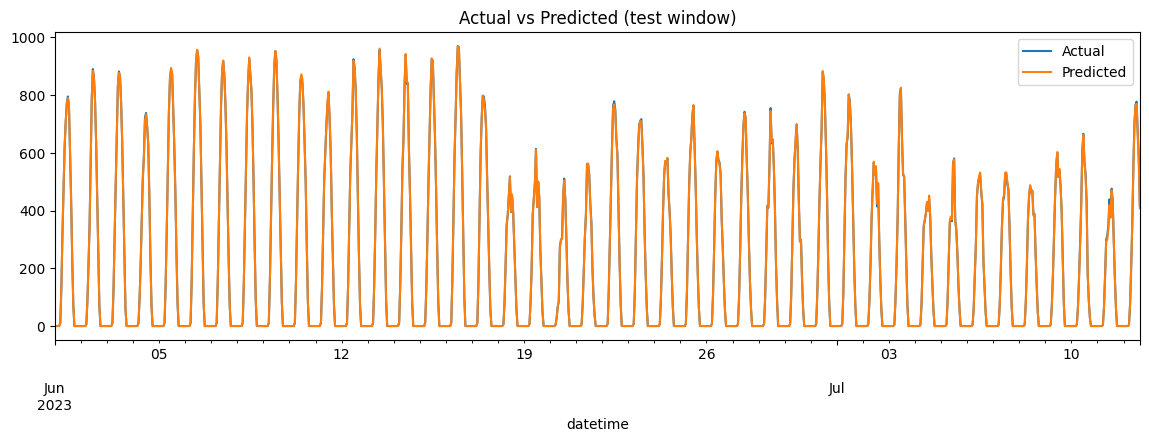

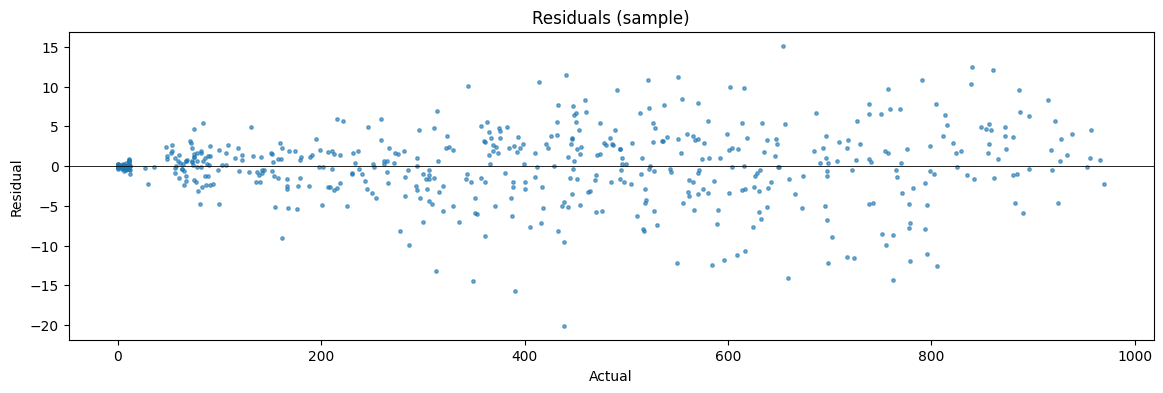

In [22]:
# --- Metrics, save predictions and plots (compatible with older sklearn versions) ---
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# pred_test and y_test should already exist (from booster.predict)
# df_test and TARGET should also exist

# compute mse then rmse (no 'squared' kwarg)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_test)
r2  = r2_score(y_test, pred_test)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R2  : {r2:.4f}")

# save predictions alongside actuals
SAVE_PRED_CSV = "test_with_preds.csv"
out = df_test[[TARGET]].copy()
out["pred_xgb"] = pred_test
out.to_csv(SAVE_PRED_CSV, index=True)
print("Saved test predictions ->", SAVE_PRED_CSV)

# quick diagnostic plots
plt.rcParams["figure.figsize"] = (14,4)
w = min(1000, len(out))
out[TARGET].iloc[:w].plot(label="Actual")
out["pred_xgb"].iloc[:w].plot(label="Predicted")
plt.legend(); plt.title("Actual vs Predicted (test window)"); plt.show()

resid = out["pred_xgb"] - out[TARGET]
plt.figure(); plt.scatter(out[TARGET].iloc[:w], resid.iloc[:w], s=6, alpha=0.6)
plt.axhline(0, color="k", linewidth=0.6); plt.xlabel("Actual"); plt.ylabel("Residual"); plt.title("Residuals (sample)"); plt.show()


Start: feature alignment -> scaler -> predict
Booster expects these top-level feature count: 35


/tmp/ipython-input-2113680596.py:124: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tmp = df_2026[target_col].fillna(method='bfill').fillna(method='ffill')
/tmp/ipython-input-2113680596.py:135: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_2026.fillna(method='bfill', inplace=True)


Prepared X with shape: (8760, 35)
First few columns: ['CLRSKY_SFC_SW_DWN', 'T2M', 'PRECTOTCORR', 'PS', 'RH2M', 'WS10M', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'daily_sum']
Scaler applied successfully.
Predictions done. Example:
2026-01-01 00:00:00    5.216053
2026-01-01 01:00:00    5.188606
2026-01-01 02:00:00    5.157179
2026-01-01 03:00:00    5.037263
2026-01-01 04:00:00    5.090651
Freq: h, Name: Forecast, dtype: float32


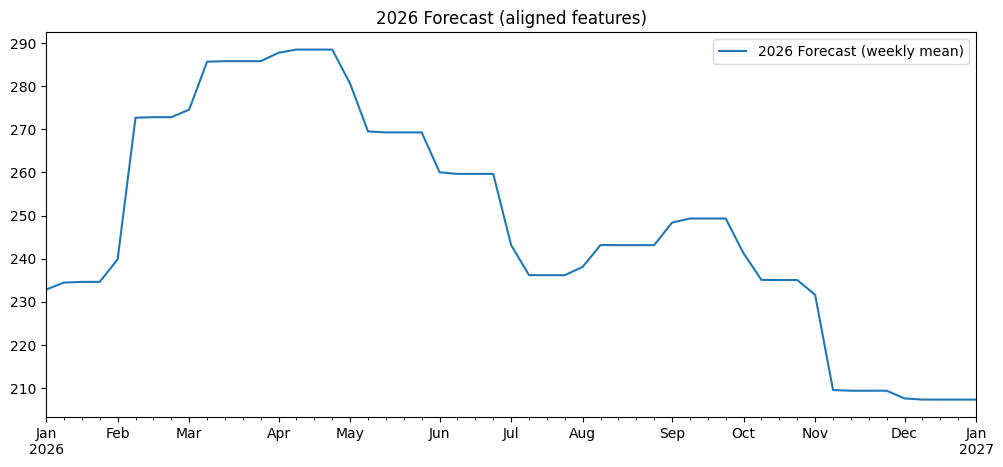

Total predicted sum: 2181444.2
Done.


In [30]:
# ===== Align features to booster training spec, apply scaler, predict for 2026 =====
import pandas as pd, numpy as np, matplotlib.pyplot as plt, traceback

print("Start: feature alignment -> scaler -> predict")

# REQUIRE: df (historical, preprocessed), model (BoosterWrapper), scaler (optional) already loaded
if 'df' not in globals():
    raise RuntimeError("df not found. Run preprocessing first.")
if 'model' not in globals():
    raise RuntimeError("model not found. Load the booster wrapper first (from xgb_booster.json).")

# Try to get the exact feature names the booster was trained with:
expected_names = None
# if the wrapper stores the underlying Booster as attribute 'booster'
try:
    # if model has attribute 'booster' and that booster has feature_names
    if hasattr(model, 'booster') and getattr(model.booster, 'feature_names', None) is not None:
        expected_names = list(model.booster.feature_names)
    # fallback: model.feature_names_in_ (if sklearn wrapper)
    elif hasattr(model, 'feature_names_in_') and getattr(model, 'feature_names_in_', None) is not None:
        expected_names = list(model.feature_names_in_)
    # Last resort: if model has attribute 'feature_names' (some older wrappers)
    elif getattr(model, 'feature_names', None) is not None:
        expected_names = list(model.feature_names)
except Exception:
    expected_names = None

if not expected_names:
    raise RuntimeError("Could not obtain feature names from the loaded model. Please print model.booster.feature_names and share them.")

print("Booster expects these top-level feature count:", len(expected_names))

# make 2026 index and basic MO/HR, hour/month as raw numeric too
future_idx = pd.date_range('2026-01-01', '2026-12-31 23:00:00', freq='h')
df_2026 = pd.DataFrame(index=future_idx)
df_2026['hour'] = df_2026.index.hour
df_2026['month'] = df_2026.index.month
df_2026['hour_sin'] = np.sin(2*np.pi*df_2026['hour']/24)
df_2026['hour_cos'] = np.cos(2*np.pi*df_2026['hour']/24)
df_2026['month_sin'] = np.sin(2*np.pi*df_2026['month']/12)
df_2026['month_cos'] = np.cos(2*np.pi*df_2026['month']/12)

# ensure df historical has MO, HR and target
df = df.copy()
if 'MO' not in df.columns or 'HR' not in df.columns:
    df['MO'] = df.index.month
    df['HR'] = df.index.hour

target_col = 'ALLSKY_SFC_SW_DWN'

# Helper: month-hour typical means from historical df
mh_means = df.groupby(['MO','HR']).mean(numeric_only=True)

def mh_get(col):
    # safe lookup of month-hour typical column (returns series indexed by datetimindex)
    if col in df.columns:
        # join directly on MO/HR
        temp = df_2026.join(df[[col]].assign(MO=df.index.month, HR=df.index.hour), how='left')
        # above is messy; simpler: map by MH means if exists
        return df_2026.join(mh_means[[col]].rename(columns={col:col}), on=[df_2026.index.month, df_2026.index.hour])
    return None

# simpler: create month (MO) and hour (HR) columns for join
df_2026['MO'] = df_2026.index.month
df_2026['HR'] = df_2026.index.hour

# Populate commonly used meteorological features by month-hour typical values if available
candidate_columns = ['CLRSKY_SFC_SW_DWN','T2M','RH2M','WS10M','PRECTOTCORR','PS',
                     'ALLSKY_SFC_UVA','ALLSKY_SFC_UVB','ALLSKY_SFC_UV_INDEX']
for col in candidate_columns:
    if col in df.columns:
        mh = df.groupby(['MO','HR'])[col].mean()
        df_2026[col] = df_2026.set_index(['MO','HR']).index.map(lambda x: mh.get(x, np.nan))
    else:
        # create placeholder NaNs for now (we may fill later)
        df_2026[col] = np.nan

# daily_sum: approximate daily sum of typical sun (group by day-of-year using historical typicals)
if target_col in df.columns:
    typical_sun = df.groupby(['MO','HR'])[target_col].mean().rename(target_col)
    df_2026[target_col] = df_2026.set_index(['MO','HR']).index.map(lambda x: typical_sun.get(x, np.nan))
    # daily sum: sum of typical_sun for that day-of-year
    # compute daily typical by DOY using historical index
    df_hist_temp = df.copy()
    df_hist_temp['doy'] = df_hist_temp.index.dayofyear
    daily_typical = df_hist_temp.groupby('doy')[target_col].sum()
    df_2026['doy'] = df_2026.index.dayofyear
    df_2026['daily_sum'] = df_2026['doy'].map(lambda d: daily_typical.get(d, np.nan))
else:
    df_2026[target_col] = np.nan
    df_2026['daily_sum'] = np.nan

# clear_sky_ratio: CLRSKY / ALLSKY (if both present), else approximate 1
if 'CLRSKY_SFC_SW_DWN' in df.columns and target_col in df.columns:
    cs_typ = df.groupby(['MO','HR'])['CLRSKY_SFC_SW_DWN'].mean()
    df_2026['CLRSKY_SFC_SW_DWN'] = df_2026.set_index(['MO','HR']).index.map(lambda x: cs_typ.get(x, np.nan))
    df_2026['clear_sky_ratio'] = df_2026['CLRSKY_SFC_SW_DWN'] / (df_2026[target_col].replace(0, np.nan))
    df_2026['clear_sky_ratio'] = df_2026['clear_sky_ratio'].fillna(1.0)
else:
    df_2026['clear_sky_ratio'] = 1.0

# Now build the target lags with exact names expected by the trained model
# Based on the error the model expects: ALLSKY_SFC_SW_DWN_lag1, lag2, lag3, lag6, lag12, lag24, lag48, lag168
lag_names_required = [n for n in expected_names if n.startswith(target_col + '_lag') or (target_col + '_lag') in n]
# We'll create common set: lag1,2,3,6,12,24,48,168
common_lags = [1,2,3,6,12,24,48,168]
for L in common_lags:
    cname = f"{target_col}_lag{L}"
    # shift the typical_sun series appropriately to create the lag (we already have df_2026[target_col] as typical)
    df_2026[cname] = df_2026[target_col].shift(L)

# Rolling windows used in model: look for roll_mean_Xh and roll_std_Xh in expected_names
# collect unique windows from expected names
import re
roll_means = sorted(set(int(m.group(1)) for m in (re.match(rf"{target_col}_roll_mean_(\d+)h", s) for s in expected_names) if m))
roll_stds  = sorted(set(int(m.group(1)) for m in (re.match(rf"{target_col}_roll_std_(\d+)h", s) for s in expected_names) if m))
# compute rolling means/stds using the typical series (resample to hourly index is already true)
if not roll_means and not roll_stds:
    # fallback to common windows
    roll_means = [3,6,12,24,72]
    roll_stds = [3,6,12,24,72]

# use the typical sun series to compute rolling features across the 2026 timeline
tmp = df_2026[target_col].fillna(method='bfill').fillna(method='ffill')
for w in set(roll_means + roll_stds):
    col_mean = f"{target_col}_roll_mean_{w}h"
    col_std  = f"{target_col}_roll_std_{w}h"
    df_2026[col_mean] = tmp.rolling(window=w, min_periods=1).mean()
    df_2026[col_std]  = tmp.rolling(window=w, min_periods=1).std().fillna(0.0)

# Also create smaller named lag columns if expected_names contain them without underscore format
# (Already created ALLSKY_SFC_SW_DWN_lagX style; model might also use different naming for these in scaler; fine.)

# Fill any remaining NaNs sensibly
df_2026.fillna(method='bfill', inplace=True)
df_2026.fillna(0.0, inplace=True)

# Remove helper columns not expected (we'll reorder straight to expected_names)
# Ensure all expected names are present in df_2026; if missing, create with zeros
for fname in expected_names:
    if fname not in df_2026.columns:
        df_2026[fname] = 0.0

# Reorder columns exactly as booster expects
X_ordered = df_2026[expected_names].copy()

print("Prepared X with shape:", X_ordered.shape)
print("First few columns:", X_ordered.columns[:10].tolist())

# If scaler exists, align scaler's feature names and reorder to that order before transform
if 'scaler' in globals() and scaler is not None:
    # attempt to get scaler feature names (sklearn scalers often have .feature_names_in_)
    scaler_fn = getattr(scaler, 'feature_names_in_', None)
    if scaler_fn is not None:
        scaler_cols = list(scaler_fn)
        # if scaler expects different names than booster, try to select those from X_ordered or warn
        missing_scaler = [c for c in scaler_cols if c not in X_ordered.columns]
        if missing_scaler:
            print("Warning: scaler expects some columns not present; filling them with zeros:", missing_scaler)
            for c in missing_scaler:
                X_ordered[c] = 0.0
        X_for_scaler = X_ordered[scaler_cols]
    else:
        # fallback: assume scaler expects same order as model, use X_ordered
        X_for_scaler = X_ordered.copy()
    try:
        X_scaled = scaler.transform(X_for_scaler)
        # convert back into DataFrame preserving column names
        if isinstance(X_scaled, np.ndarray):
            X_pre = pd.DataFrame(X_scaled, index=X_ordered.index, columns=X_for_scaler.columns)
        else:
            X_pre = X_scaled
        print("Scaler applied successfully.")
    except Exception:
        print("Scaler.transform failed. Falling back to raw features and printing the exception:")
        traceback.print_exc()
        X_pre = X_ordered.copy()
else:
    X_pre = X_ordered.copy()

# Final predict: use X_pre but ensure columns order matches expected_names used by booster.predict
# If scaler changed column order to scaler_cols, but booster expects expected_names, reorder:
if list(X_pre.columns) != expected_names:
    # try to reorder or reindex (if scaler returned different subset)
    try:
        X_for_model = X_pre.reindex(columns=expected_names).fillna(0.0)
    except Exception:
        X_for_model = X_pre.copy()
else:
    X_for_model = X_pre.copy()

# Predict using model (wrapper that uses booster.predict)
try:
    preds = model.predict(X_for_model)
except Exception:
    print("Primary predict failed. Printing traceback and trying numeric coercion fallback.")
    traceback.print_exc()
    Xtmp = X_for_model.apply(pd.to_numeric, errors='coerce').fillna(0.0)
    preds = model.predict(Xtmp)

df_2026['Forecast'] = preds
print("Predictions done. Example:")
print(df_2026['Forecast'].head())

# Plot weekly average
plt.figure(figsize=(12,5))
df_2026['Forecast'].resample('W').mean().plot(label='2026 Forecast (weekly mean)')
plt.title("2026 Forecast (aligned features)")
plt.legend()
plt.show()

print("Total predicted sum:", df_2026['Forecast'].sum())
print("Done.")


In [31]:
df_2026[['Forecast']].to_csv('forecast_2026_hourly.csv')
print("Saved forecast_2026_hourly.csv")


Saved forecast_2026_hourly.csv


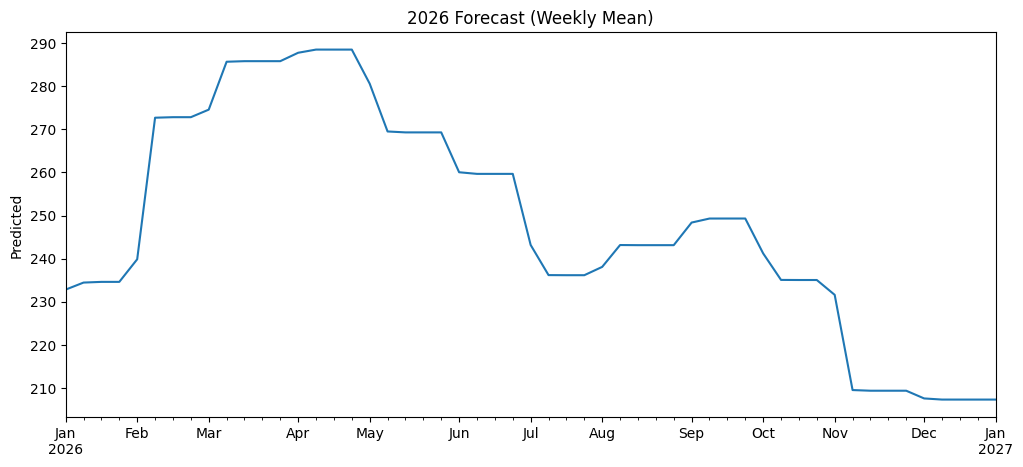

Saved forecast_2026_weekly.png


In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
df_2026['Forecast'].resample('W').mean().plot()
plt.title("2026 Forecast (Weekly Mean)")
plt.ylabel("Predicted")
plt.savefig('forecast_2026_weekly.png', dpi=200, bbox_inches='tight')
plt.show()
print("Saved forecast_2026_weekly.png")


In [34]:
monthly = df_2026['Forecast'].resample('ME').sum()
print(monthly)


2026-01-31    174343.390625
2026-02-28    183282.187500
2026-03-31    212615.015625
2026-04-30    207735.734375
2026-05-31    200447.000000
2026-06-30    187023.890625
2026-07-31    175749.890625
2026-08-31    180876.859375
2026-09-30    179490.031250
2026-10-31    174879.218750
2026-11-30    150787.546875
2026-12-31    154213.453125
Freq: ME, Name: Forecast, dtype: float32


In [35]:
annual_kwh_m2 = df_2026['Forecast'].sum()/1000.0
print(f"Annual (approx) = {annual_kwh_m2:.2f} kWh/m^2")


Annual (approx) = 2181.44 kWh/m^2


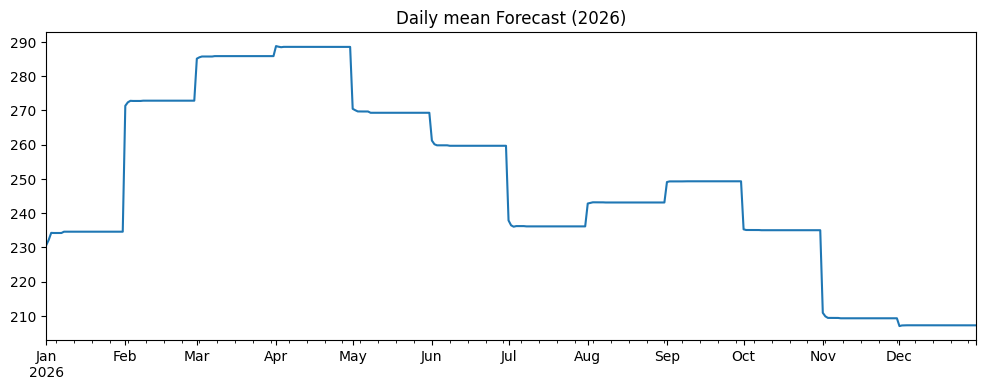

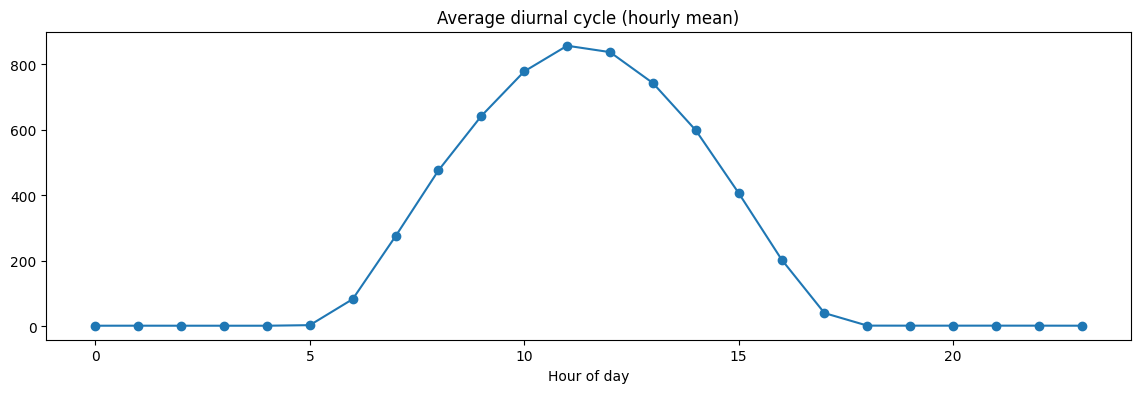

In [36]:
# daily average across year
df_2026['Forecast'].resample('D').mean().plot(title='Daily mean Forecast (2026)', figsize=(12,4))
plt.show()

# average diurnal cycle (hour of day)
df_2026.groupby(df_2026.index.hour)['Forecast'].mean().plot(marker='o', title='Average diurnal cycle (hourly mean)')
plt.xlabel('Hour of day')
plt.show()
